## Principal Component Analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. If there are $n$ observations with $p$ variables, then the number of distinct principal components is $min(n-1,p)$. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing $n$ observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

![Principal Component Analysis](images/pca.png)
Image source: http://mengnote.blogspot.com/2013/05/an-intuitive-explanation-of-pca.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition.pca import PCA

In [2]:
iris = load_iris()

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = np.array(iris.target_names)[iris.target]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


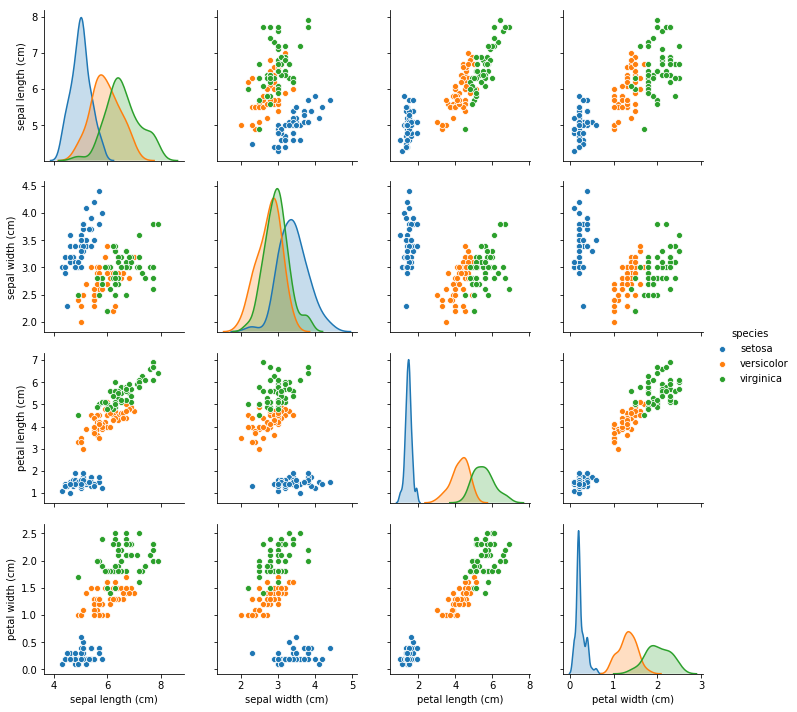

In [3]:
plot = sns.pairplot(data, hue='species', vars=iris.feature_names, kind='scatter')

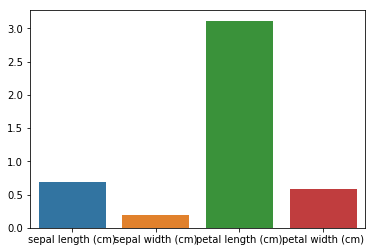

In [4]:
variance = [data[column].var() for column in iris.feature_names]
plot = sns.barplot(iris.feature_names, variance)

In [5]:
pca = PCA(n_components=4)
pca_columns = ['pc1', 'pc2', 'pc3', 'pc4']
pca_data = pd.DataFrame(data=pca.fit_transform(iris.data), columns=pca_columns)
pca_data['species'] = data['species']
pca_data.head()

,pc1,pc2,pc3,pc4,species
0,-2.684207,0.326607,-0.021512,0.001006,setosa
1,-2.715391,-0.169557,-0.203521,0.099602,setosa
2,-2.889820,-0.137346,0.024709,0.019305,setosa
3,-2.746437,-0.311124,0.037672,-0.075955,setosa
4,-2.728593,0.333925,0.096230,-0.063129,setosa


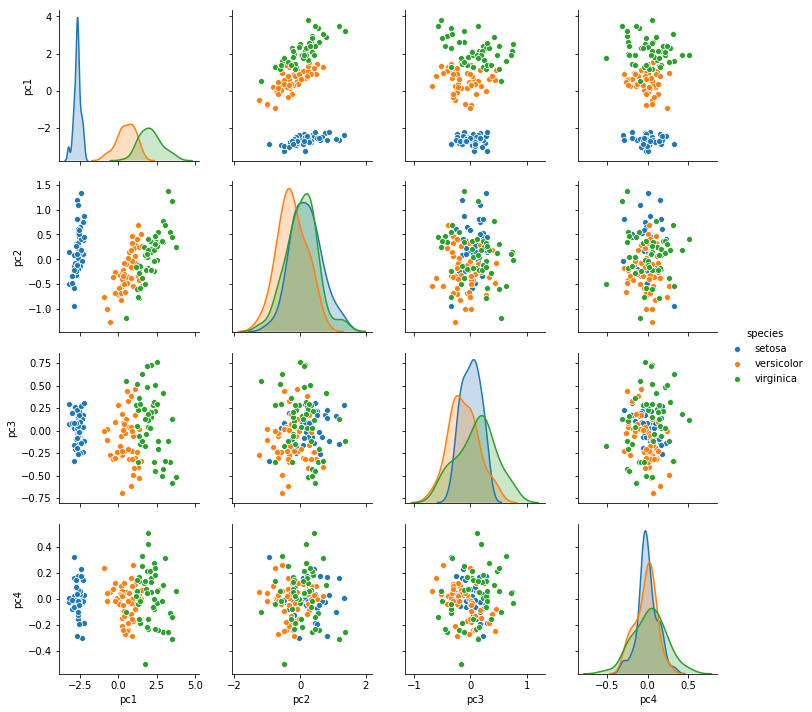

In [6]:
plot = sns.pairplot(pca_data, hue='species', vars=pca_columns, kind='scatter')

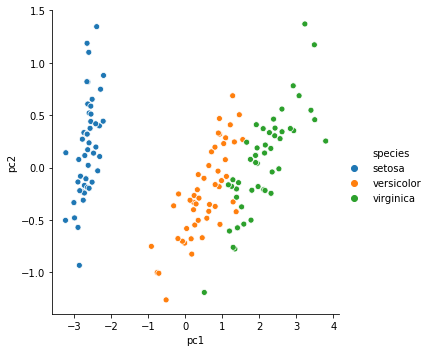

In [7]:
plot = sns.relplot(x='pc1', y='pc2', hue='species', data=pca_data)

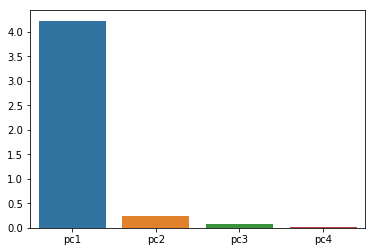

In [8]:
variance = [pca_data[column].var() for column in pca_columns]
plot = sns.barplot(pca_columns, variance)

# t-Distributed Stochastic Neighbor Embedding

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique allows to be applied on large real-world datasets. Introduced by van der Maaten and Hinton in 2008 [1].

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits

digits_dataset = load_digits()

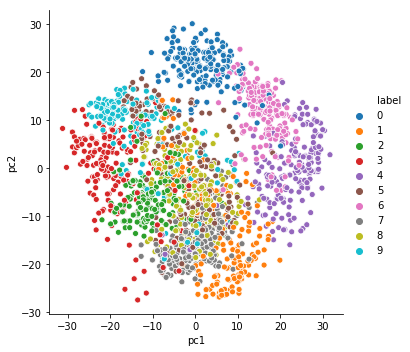

In [10]:
from sklearn.decomposition.pca import PCA


features = PCA(n_components=2).fit_transform(digits_dataset.data)
digits = pd.DataFrame(data=features, columns=['pc1', 'pc2'])
digits['label'] = digits_dataset.target

plot = sns.relplot(x='pc1', y='pc2', hue='label', data=digits, palette=sns.color_palette())

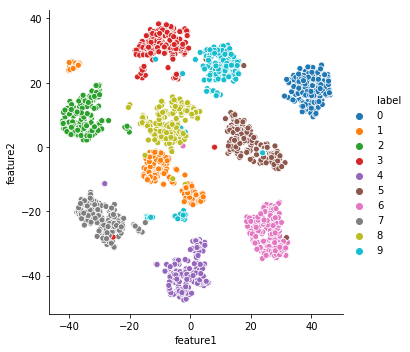

In [11]:
from sklearn.manifold import TSNE


features = TSNE(n_components=2, n_iter=500).fit_transform(digits_dataset.data)
digits = pd.DataFrame(data=features, columns=['feature1', 'feature2'])
digits['label'] = digits_dataset.target

plot = sns.relplot(x='feature1', y='feature2', hue='label', data=digits, palette=sns.color_palette())

### References

1. L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9(Nov):2579-2605, 2008.
2. https://distill.pub/2016/misread-tsne/